## 6.4 U.S.A Real Estate Machine Learning Part 1 -NK (comparing bed vs price)

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: analyze if performance improvement after removing outliers 

### 1. Importing libraries and data

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


matplotlib.use('Agg')

In [17]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [18]:
path = r'/Users/nancykray/Desktop/Real Estate Project'

In [19]:
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_clean6.pkl'))

In [20]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'Price category'],
      dtype='object')

In [21]:
df.head(20)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.000,0,Middle price
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.000,0,Low price
7,50739.0,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.000,0,Low price
8,81909.0,for_sale,100000.0,2.0,1.0,0.09,734904.0,Ponce,Puerto Rico,730.0,1092.000,0,Middle price
9,65672.0,for_sale,300000.0,5.0,3.0,7.46,1946226.0,Las Marias,Puerto Rico,670.0,5403.000,0,Middle price


In [22]:
df.shape

(2217918, 13)

#### Missing Values Check

In [23]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
Price category    0
dtype: int64

#### Dulicates check

In [24]:
dups = df.duplicated()

In [25]:
dups.shape # No dups

(2217918,)

#### Extreme Values Check

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_22151/830749990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=15) # Shows extreme values
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


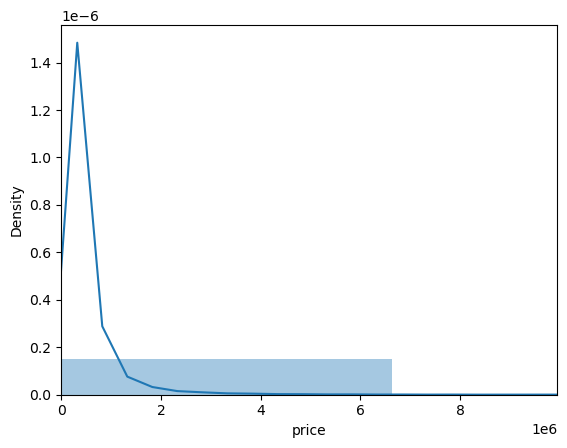

In [29]:
sns.distplot(df['price'], bins=15) # Shows extreme values
plt.xlim([0, 9950000 ]) # set x axis liimits (I added this but doesn't seem to make a difference)

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.


# Save the plot to a file
plt.savefig('price_distribution.png')

# Show the plot (optional)
plt.show()


In [30]:
df['price'].mean() # Check the mean

520393.44181488676

In [31]:
df['price'].median() # Check the median

325000.0

In [32]:
df['price'].max() # Check the max

99500000.0

In [33]:
df['price'].min()

1.0

### 3. Data prep for regression analysis 

### Hypothesis: Properties with more bedrooms will have higher prices

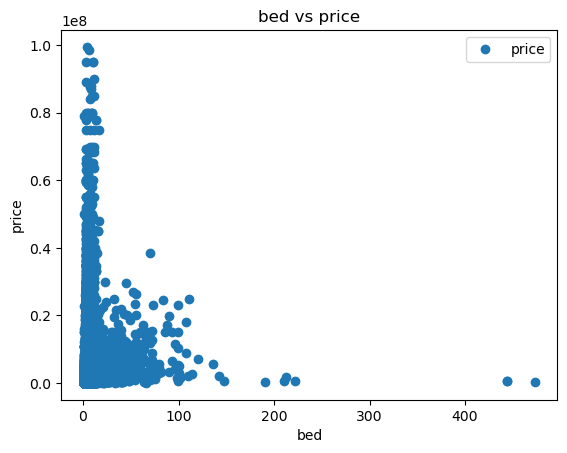

<Figure size 640x480 with 0 Axes>

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'bed', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('bed vs price')  
plt.xlabel('bed')  
plt.ylabel('price')  
plt.show()


# Save the plot to a file
plt.savefig('scatter_plot_bed_price.png')

# Show the plot (optional)
plt.show()


### create again using plt.scatter in order save it (otherwise it was not saving correctly)

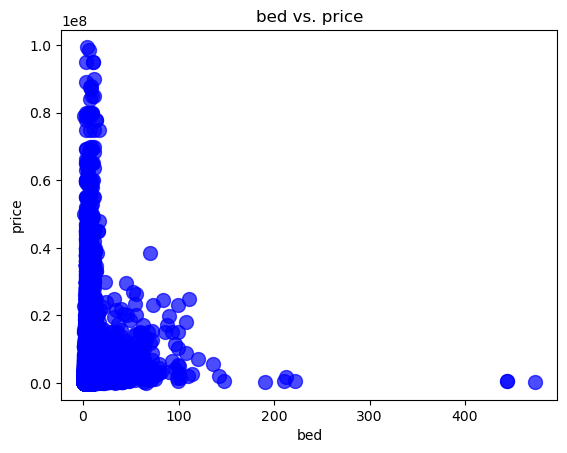

In [45]:
# Create the scatter plot with circle markers
plt.scatter(df['bed'], df['price'], marker='o', s=100, color='blue', alpha=0.7)

# Add title and labels
plt.title('bed vs. price')
plt.xlabel('bed')
plt.ylabel('price')

# Save the plot to a file
plt.savefig('scatter_plot_bed_price.png')

# Show the plot
plt.show()

In [46]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['bed'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [47]:
X

array([[3.],
       [4.],
       [2.],
       ...,
       [6.],
       [2.],
       [5.]])

In [48]:
y

array([[105000.],
       [ 80000.],
       [ 67000.],
       ...,
       [440000.],
       [179900.],
       [580000.]])

In [49]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [50]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [51]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

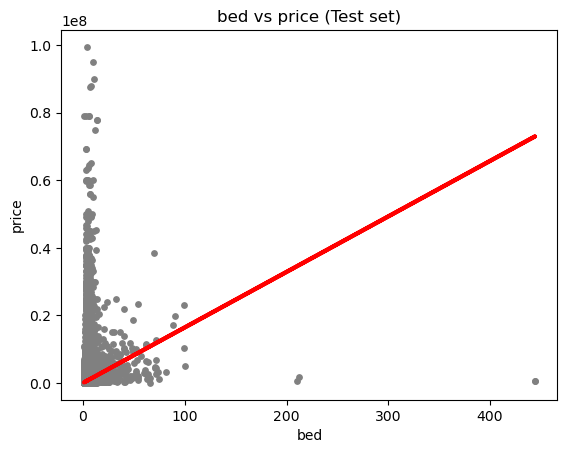

In [57]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('bed vs price (Test set)')
plot_test.xlabel('bed')
plot_test.ylabel('price')
plot_test.savefig('test_plot_bed_price.png')
plot_test.show()



This line shows the expected trajectory of more bedroooms correlating wtih higher price

In [58]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [59]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[164406.87040991]]
Mean squared error:  1266222521648.4465
R2 score:  0.0276912789974606


#### - Positive slope is huge!  (as x rises, y rises, meaning as number of bed increases, so does the price)
#### - Mean squared error (MSE) doesn't make sense (too large), implicating that this does not have good accuracy
#### - R2 score is closer to 0 than 1, making it not a good fit

In [60]:
y_predicted

array([[475388.61229152],
       [310981.74188162],
       [475388.61229152],
       ...,
       [310981.74188162],
       [520751.59156816],
       [475388.61229152]])

In [61]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,59900.0,475388.612292
1,70000.0,310981.741882
2,175000.0,475388.612292
3,900000.0,639795.482701
4,63600.0,639795.482701
5,358900.0,639795.482701
6,44000.0,804202.353111
7,669900.0,475388.612292
8,175000.0,639795.482701
9,399000.0,475388.612292


##### Compare how the regression fits the training set

In [62]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [63]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [64]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[164406.87040991]]
Mean squared error:  1244974958300.5198
R2 score:  0.03717658925967038


##### Compare the predicted y values with the actual y values in a dataframe.
##### Slope: [[164406.87040991]]
##### Mean squared error:  1266222521648.4465
##### R2 score:  0.0276912789974606  
##### THey are similar to these prior values

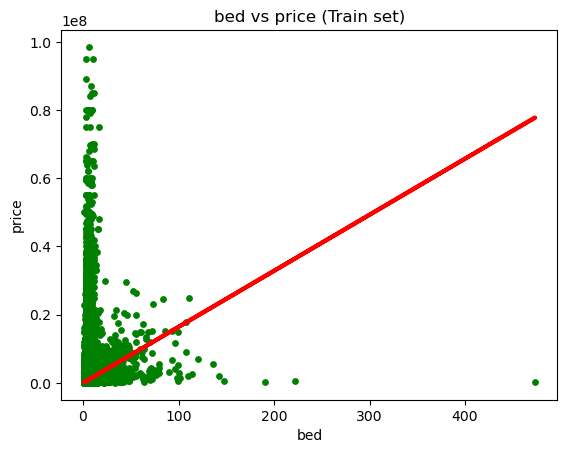

In [65]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('bed vs price (Train set)')
plot_test.xlabel('bed')
plot_test.ylabel('price')
plot_test.savefig('train_plot_bed_price.png')
plot_test.show()

##### Based off the visulization of these data points, I don't think that removing outliers will change the relationship between price of house and number of bedrooms.  

In [66]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['price'] <=100] 